# Chapter 2

## Map vs. Terrain
- The model is the map. Even a fabulous map ain't ever the terrain. The terrain is reality.

## Counting Possibilities
- Count possiblities for a given conjecture (or all conjectures)
- For-each conjecture, count the ways to produce the observed data (this becomes the `prior counts`)
- For-each new observation, count the ways to produce and multiply the ways to produce by the prior counts

This updating approach is asserting that:
1. When we have previous information suggestiong there are $W_{prior}$ ways for a conjecture to produce a previous observation $D_{prior}$ and
2. We acquire new observations $D_{new}$ that the same conjecture can produce in $W_{new}$ ways, then
3. The number of ways the conjecture can account for both $D_{prior}$ and $D_{new}$ is the product $W_{prior} * W_{new}$

Plausability of $p$ after $D_{new}$ = (ways $p$ can produce $D_{new}$ * prior plausability $p$) / sum of products


> Say we see Blue, White, then Blue from a bag of 4 marbles of blue or white, but we don't know the distribution.


| Conjecture | Ways to produce Blue, White, Blue |
| ---------- | --------------------------------- |
| WWWW       | 0                                 |
| BWWW       | 3                                 |
| BBWW       | 8                                 |
| BBBW       | 9                                 |
| BBBB       | 0                                 |

Becomes

| Possible Combinations | p, which is p(blue) here | Ways to produce data we see ( Blue, White, Blue) | Plausability |
| --------------------- | ------------------------ | ------------------------------------------------ | ------------ |
| WWWW                  | 0                        | 0                                                | 0            |
| BWWW                  | .25                      | 3                                                | .15          |
| BBWW                  | .5                       | 8                                                | .4           |
| BBBW                  | .75                      | 9                                                | .45          |
| BBBB                  | 1                        | 0                                                | 0            |

In [1]:
# 0, 3, 8, 9, 0 are the priors, 
# the number of ways each of the 5 conjectures of combinations of 4 blue or white marbles
# All conjectures are: WWWW, BWWW, BBWW, BBBW, BBBB
# can produce the sequence Blue, White, Blue
ways <- c(0, 3, 8, 9, 0)
ways / sum(ways)

[1] 0.00 0.15 0.40 0.45 0.00

## Key Vocabulary
- Unobserved variables are usually called `parameters`. But while `p` itself is unobserved, we can infer it from the other variables.
- A conjectured proportion of blue marbles, `p`, is usually called the `parameter` value. It's a way of indexing possible explanations of the data
- The relative number of ways that a value `p` can produce the data is usually called a `likelihood`. It is derived by enumerating all the possible data sequences that could have happened and elminating those sequences inconsistent/impossible with the data observed.
- The prior plausability of any specific `p` is usually called the `prior probability`
- The new, updated plausability of any specific `p` is usually called the `posterior probability`

## Counting is Key
Consider three different kinds of things we counted in the previous sections.
1. The number of ways each conjecture could produce an observation
2. The accumulated number of ways each conjecture could produce the entire data.
3. The initial plausibility of each conjectured cause of the data

### With the Water or Land Proportion of the Earth Problem
- In this case `p` is the proportion of land to earth. `p` is the unobserved information (the parameter). We can infer `p` from other variables.
- We'll call the count of land L and the count of water W
- In $N = L + W$ the $N$ is the total number of counts of all observations

> Remember, the goal is count all the ways the data could arise, given the assumptions.

$$Pr(W,L|P) = \frac{(W + L)!}{W!L!}p^W (1 - p)^L$$


> Read as: The counts of “water” W and “land’ L are distributed binomially, with prob- ability p of “water” on each toss.

In [2]:
# So if we have a count of 9 and 6 were W
# This number is the relative number of ways to get six water, holding p at 0.5 and N = W + L at nine. 
dbinom(6, size=9, prob=0.5)

[1] 0.1640625

In [3]:
for (p in seq(from=0, to=1, by=.05)) {
    print(dbinom(6, size=9, prob=p))
}

[1] 0
[1] 1.125305e-06
[1] 6.1236e-05
[1] 0.0005876025
[1] 0.002752512
[1] 0.008651733
[1] 0.02100395
[1] 0.04240603
[1] 0.07431782
[1] 0.1160493
[1] 0.1640625
[1] 0.2118815
[1] 0.2508227
[1] 0.2716211
[1] 0.2668279
[1] 0.2335968
[1] 0.1761608
[1] 0.1069219
[1] 0.04464104
[1] 0.007718465
[1] 0


## Unobserved variables 
The distributions we assign to the observed variables typically have their own variables. In the binomial above, there is p, the probability of sampling water. Since p is not observed, we usually call it a parameter. Even though we cannot observe p, we still have to define it.

In statistical modeling, many of the most common questions we ask about data are answered directly by parameters:
- What is the average difference between treatment groups?
- How strong is the association between a treatment and an outcome?
- Does the effect of the treatment depend upon a covariate?
- How much variation is there among groups?

For every parameter you intend your Bayesian machine to consider, you must provide a distribution of prior plausibility, its prior. 

$W ∼ Binomial(N, p)$ where N = W + L

And the unobserved parameter p similarly gets:

$p ∼ Uniform(0, 1)$

meaning `p` has a uniform, flat, prior over the entire possible range from 0 to 1.

A re-expression of the garden of forking-data, a derivation of Bayes's Theorum
$$ Pr(W,L,p) = Pr(W,L|p) * Pr(p)$$

also

$$Pr(W,L,p) = Pr(p|W,L) * Pr(W,L)$$

$$ Posterior = \frac{Probability of the data * Prior}{Average Probability of the data}$$

## The key lesson is that the posterior is proportional to the product of the prior and the probability of the data.

3 different conditioning engines, numerical techniques for computing posterior distributions
1. Grid approximation
2. Quadratic approximation
3. Markov chain Monte Carlo (MCMC)
- There are other engines and new ones invented all the time, these are what are in the text

Generally, a model is a composit of a prior and a likelihood. We should also consider how a model is fit to the data as part of the model, too.

<hr>

# Grid Approximpation
- While most parameters are continuous, we can achieve excellent approximation by considering only a finite grid of parameter values.

1. Define the grid. You decide how many points to use in estimating the posterior and then you make a list of the parameter values on the grid.
2. Compute the value of the prior at each parameter value on the grid.
3. Compute the likelihood at each parameter value.
4. Compute the unstandardized posterior at each parameter value, by multiplying the prior by the likelihood
5. Standardize the posterior by dividing each value by the sum of all values.

In [4]:
# define the grid
n = 80

p_grid <- seq(from=0, to=1, length.out=n)

# define the prior
# In this case, it's a uniform prior (probably for ease of getting started)
prior <- rep(1, n)

# Compute the likelihood 
likelihood <- dbinom(6, size=9, prob=p_grid)

# Compute the product of the likelihood and the prior
unstd.posterior <- likelihood * prior

# Standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)

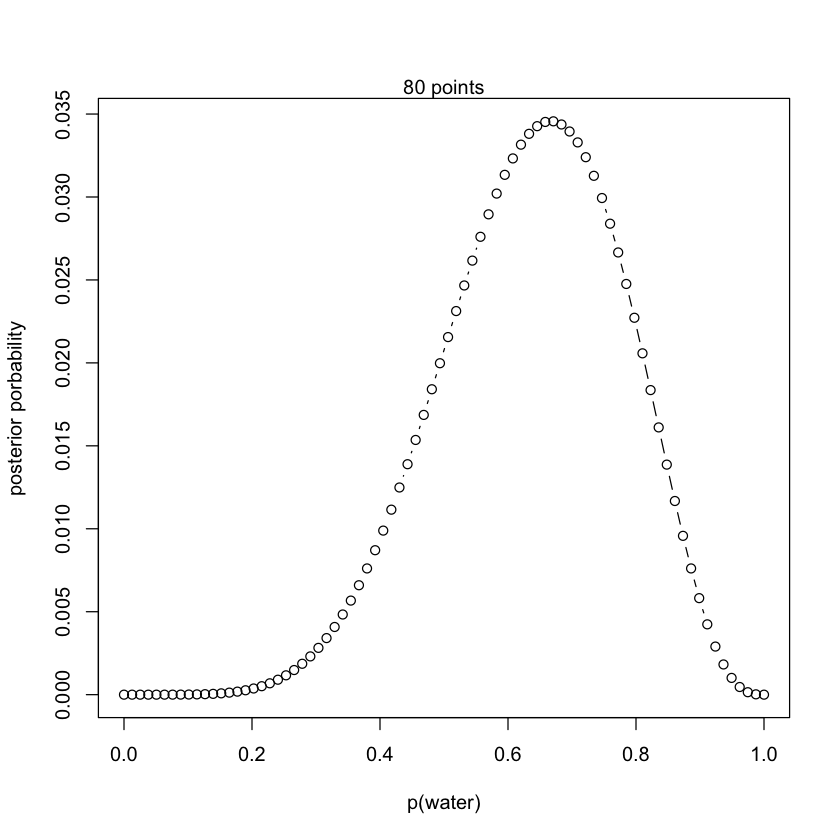

In [5]:
plot(p_grid, posterior, type="b", xlab="p(water)", ylab="posterior porbability")
mtext(paste(n, "points"))

In [6]:
prior <- ifelse(p_grid < 0.5 , 0 , 1)
prior <= exp( -5 * abs( p_grid - 0.5))

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[37]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE